# Machine Learning - Project

## Objective:
We will create a model for **Credit Card Fraud Detection** using Python.
Fake news refers to information content that is false, misleading or whose source cannot be verified.

## Make necessary imports:

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss

In [2]:
#importing datasets  
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Columns in Dataset
**Time**: Number of seconds elapsed between this transaction and the first transaction in the dataset

**v1-v28**: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features

**Amount**: Transaction amount

**Class**: 1 for fraudulent transactions, 0 otherwise

We will use **Logistic Regression** as we need to predict categorical dependent variable **Class**

## Data Cleaning and Preprocessing

Check the size of the dataframe/table as it would decide whether we can drop the rows with null values without affecting the size of our dataset or not

In [4]:
data.shape

(284807, 31)

In [5]:
#Checking the total number of missing values in each of the columns.
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have no missing data!

We will check the statistics and correlation between all the columns

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Now Let’s explore the unique values in the each category using below code.

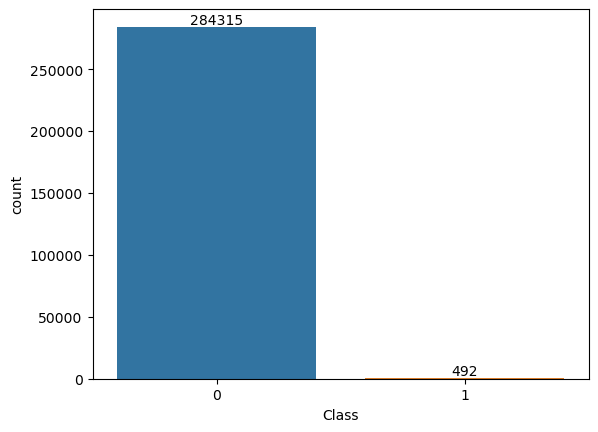

In [7]:
ax = sns.countplot(data=data,
              x='Class',
              order=data['Class'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

The data is very uneven.

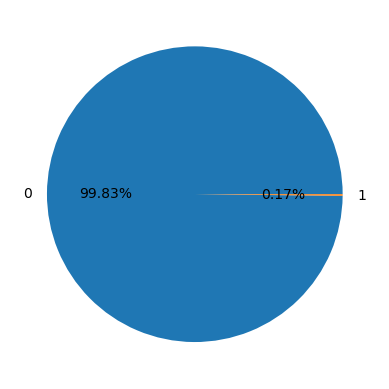

In [8]:
temp = data['Class'].value_counts()
plt.pie(temp.values,
       labels = temp.index,
       autopct = '%1.2f%%')
plt.show()

In [9]:
#Extracting Independent and dependent Variable  
x_data = data.drop('Class', axis = 1)
y_data = data['Class']

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>.

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 71202
number of training samples: 213605


In [11]:
y_train_values = y_train.value_counts()
y_test_values = y_test.value_counts()
print(y_train_values)
print(y_test_values)

Class
0    213224
1       381
Name: count, dtype: int64
Class
0    71091
1      111
Name: count, dtype: int64


**Feature Scaling**

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:

In [12]:
#Feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

__2. Fitting the Random Forest algorithm to the training set:__

Now we will fit the Random forest algorithm to the training set. To fit it, we will import the RandomForestClassifier class from the sklearn.ensemble library. The code is given below:

In [13]:
rf_metrics = pd.DataFrame(columns = ['RF_Estimators', 'Confusion Matrix', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

We can run below cell for different number of decision trees, i.e. n_estimators = 10 to 25, so that we can check how many decision trees give the most effective model.

In [20]:
t1 = time.time()

for i in range(10, 26, 2):
    #Fitting Decision Tree classifier to the training set
    classifier = RandomForestClassifier(n_estimators= i, criterion="entropy")
    classifier.fit(x_train, y_train)

    #Predicting the test set result
    y_pred = classifier.predict(x_test)

    #Creating the Confusion matrix, Precision, Recall, F1-Score
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rf_metrics = rf_metrics._append({'RF_Estimators': i, 'Confusion Matrix':cm, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1 Score':f1}, ignore_index = True)
    
t2 = time.time()
print("Time taken by for loop: %.6f" % (t2 - t1))

Time taken by for loop: 266.897702


In [22]:
rf_metrics

,RF_Estimators,Confusion Matrix,Accuracy,Precision,Recall,F1 Score
0,10,"[[71086, 5], [27, 84]]",0.999551,0.943820,0.756757,0.840000
1,12,"[[71086, 5], [29, 82]]",0.999522,0.942529,0.738739,0.828283
2,14,"[[71086, 5], [27, 84]]",0.999551,0.943820,0.756757,0.840000
3,16,"[[71083, 8], [30, 81]]",0.999466,0.910112,0.729730,0.810000
4,18,"[[71086, 5], [28, 83]]",0.999537,0.943182,0.747748,0.834171
5,20,"[[71087, 4], [29, 82]]",0.999537,0.953488,0.738739,0.832487
6,22,"[[71086, 5], [25, 86]]",0.999579,0.945055,0.774775,0.851485
7,24,"[[71086, 5], [30, 81]]",0.999508,0.941860,0.729730,0.822335


We can see that if n_estimators = 20, i.e. 20 decision trees, we get good f1-score. Hence we can use that model.

In [ ]:
t1 = time.time()

for i in range(10, 26, 2):
    #Fitting Decision Tree classifier to the training set
    classifier = RandomForestClassifier(n_estimators= i, criterion="entropy")
    classifier.fit(x_train, y_train)

    #Predicting the test set result
    y_pred = classifier.predict(x_test)

    #Creating the Confusion matrix, Precision, Recall, F1-Score
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rf_metrics = rf_metrics._append({'RF_Estimators': i, 'Confusion Matrix':cm, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1 Score':f1}, ignore_index = True)
    
t2 = time.time()
print("Time taken by for loop: %.6f" % (t2 - t1))

In [15]:
#Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

classifier = RandomForestClassifier(n_estimators= 20, criterion="entropy")
ffs = SequentialFeatureSelector(classifier, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(x_train, y_train)
features = list(ffs.k_feature_names_)
features = list(map(int, features))
print(features)
classifier.fit(x_train[features], y_train)
y_pred = classifier.predict(x_test)
#Creating the Confusion matrix, Precision, Recall, F1-Score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

[0, 5, 9, 10, 14, 16, 17, 18, 19, 21, 29]


ValueError: Found input variables with inconsistent numbers of samples: [11, 213605]

In [24]:
x_train[:,features].shape

(213605, 11)

In [25]:
classifier.fit(x_train[:,features], y_train)
y_pred = classifier.predict(x_test[:,features])
#Creating the Confusion matrix, Precision, Recall, F1-Score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [26]:
print(cm)
print(accuracy)
print(precision)
print(recall)
print(f1)

[[71084     7]
 [   28    83]]
0.9995084407741356
0.9222222222222223
0.7477477477477478
0.8258706467661691
